<a href="https://colab.research.google.com/github/20KMJ/ESAA7/blob/main/OB2_PJ1_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Reservations**
Can you predict if customer is going to cancel the reservation ?

---

## **1. 대회 소개 및 변수 설명**
**[Kaggle] Hotel Reservations Dataset** <br/>
- 호텔 예약의 취소 여부를 판단
- 평가 지표: Accuracy(정확도)
- https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

**변수 (12개)**
- Booking_ID
- no_of_adults
- no_of_children
- no_of_weekend_nights
- no_of_week_nights
- type_of_meal_plan
- required_car_parking_space: 주차장 요구여부 (0 - No, 1 - Yes)
- room_type_reserved
- lead_time: 예약 날짜와 도착 날짜 사이의 일 수
- arrival_year
- arrival_month
- arrival_date
- market_segment_type
- repeated_guest: 재방문 고객여부 (0 - No, 1 - Yes)
- no_of_previous_cancellations: 현재 예약 전 고객이 취소한 적 있는 예약 수
- no_of_previous_bookings_not_canceled: 현재 예약 전 고객이 취소하지 않은 이전 예약 수
- avg_price_per_room: 예약의 일평균 가격 (단위: 유로)
- no_of_special_requests: 고객의 요청사항 수
- **booking_status**: 예약 취소 여부

---

## **2. 데이터 불러오기**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import warnings 
warnings.filterwarnings(action='ignore')

In [ ]:
hotel = pd.read_csv('Hotel Reservations.csv')
data = hotel.copy()

**데이터 탐색**

In [ ]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


---

## **3. EDA**

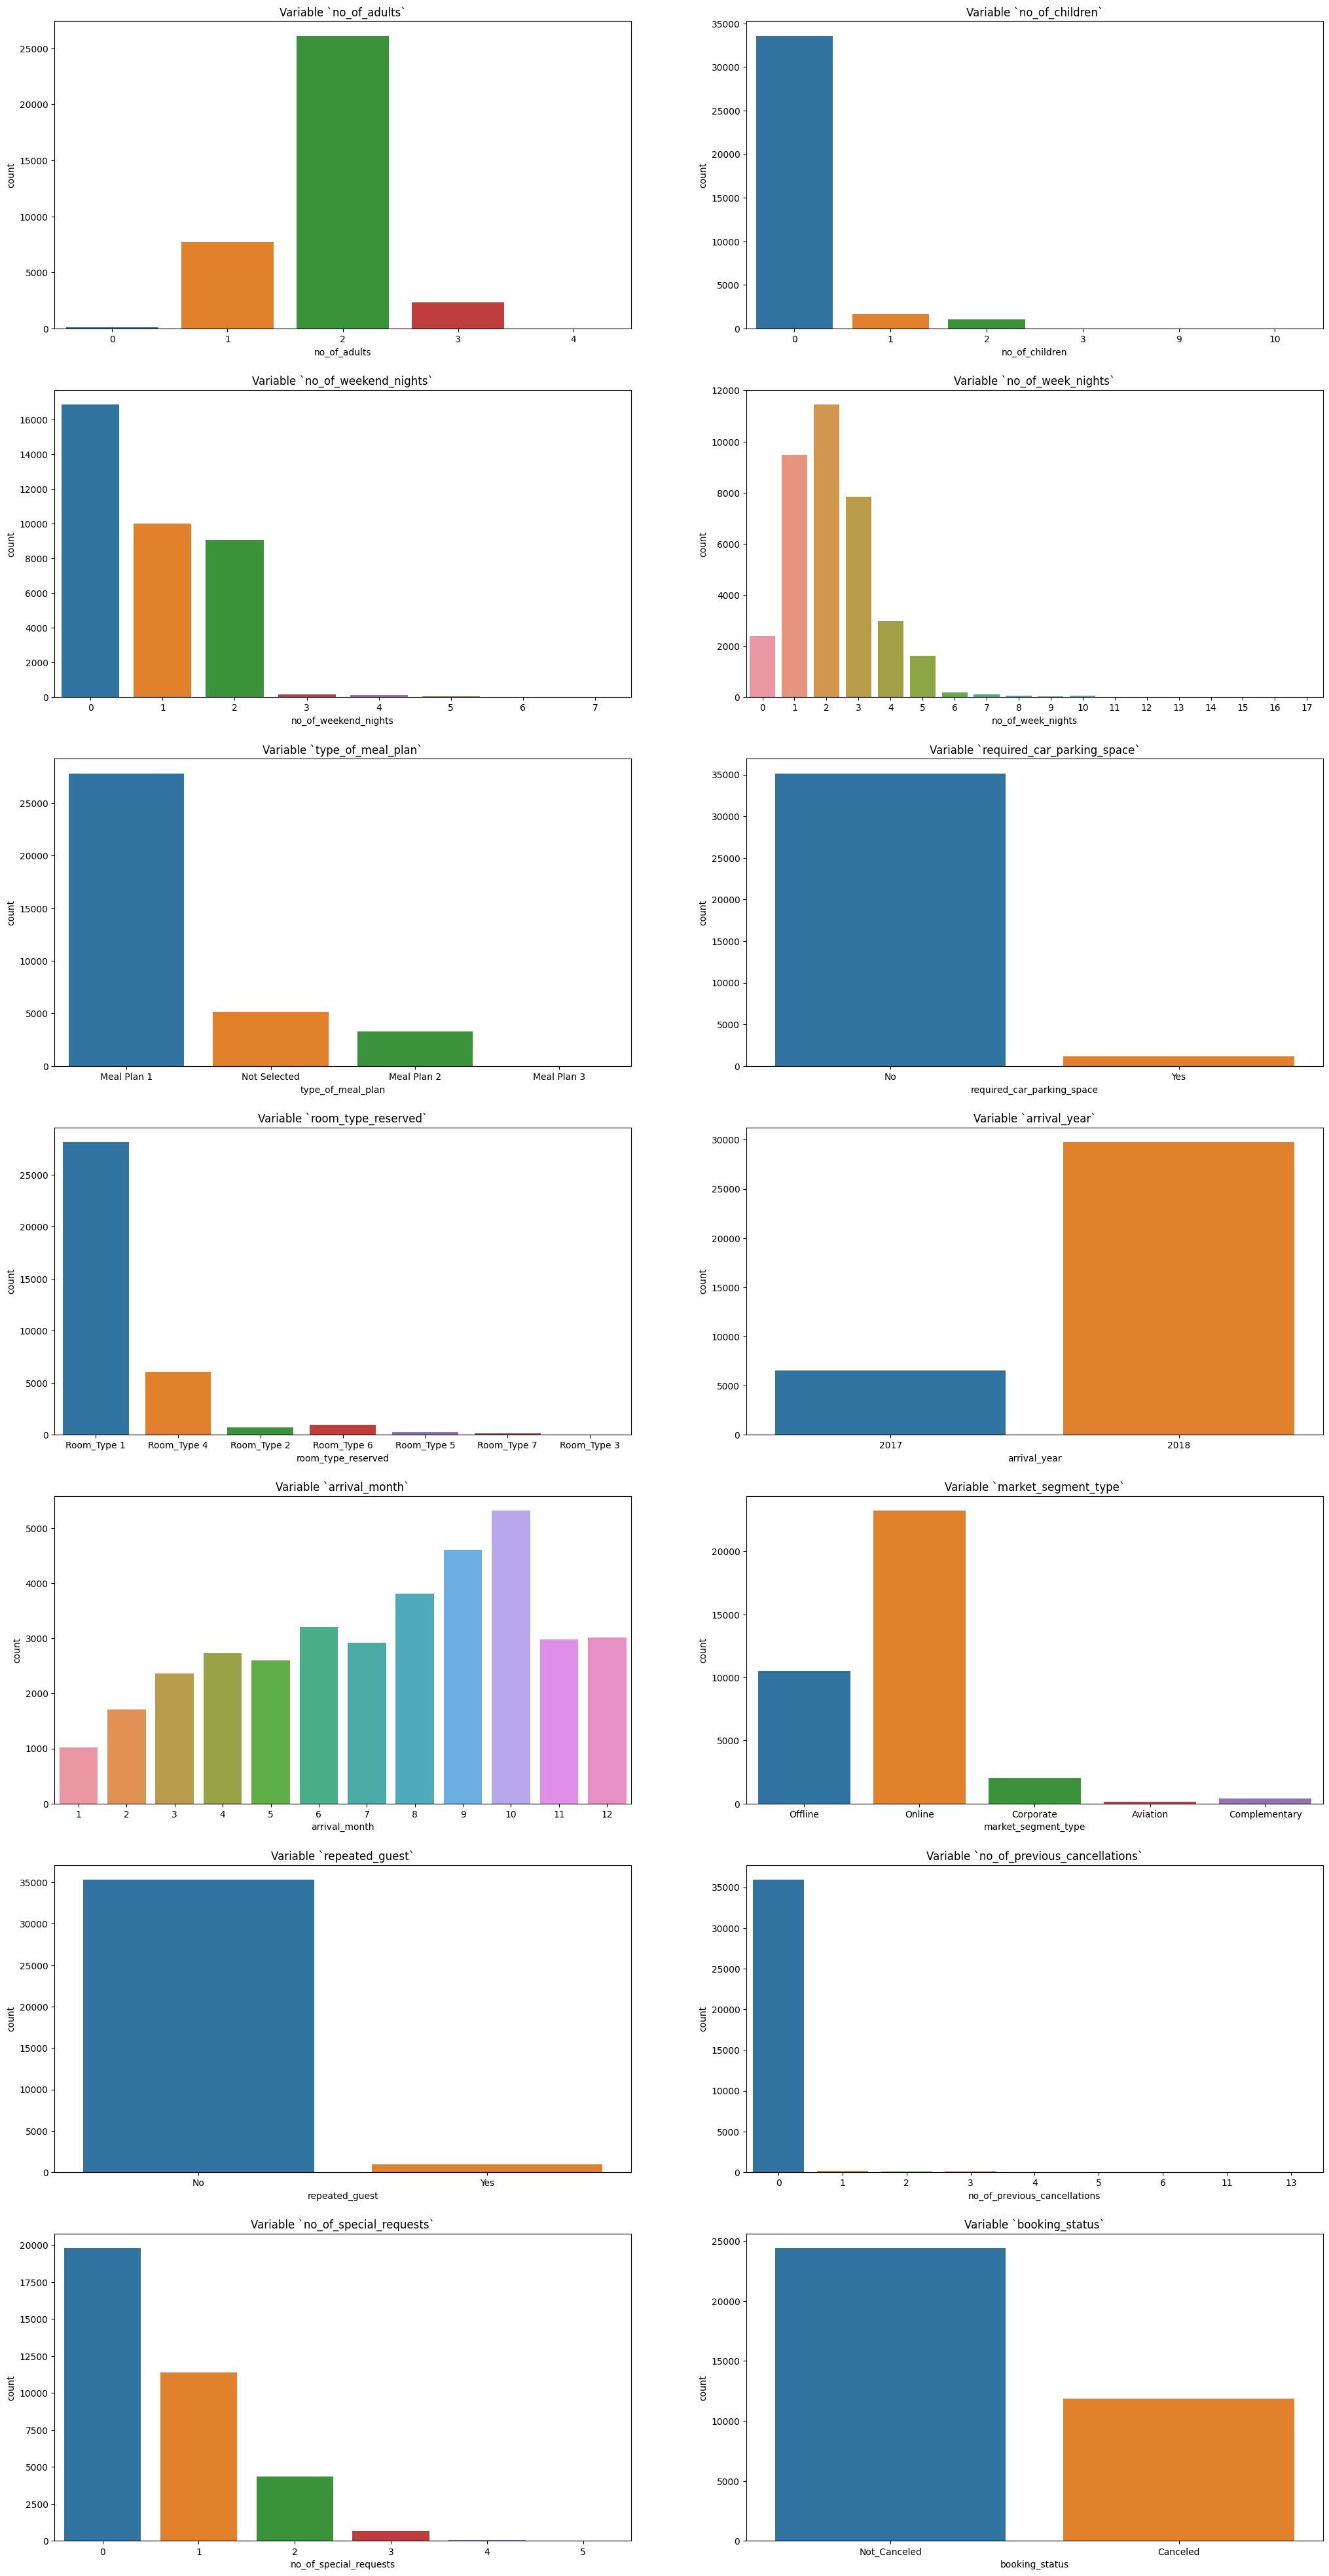

In [ ]:
# required_car_parking_space (0:No, 1:Yes)
data['required_car_parking_space'].replace(0, "No", inplace=True)
data['required_car_parking_space'].replace(1, "Yes", inplace=True)
# repeated_guest (0:No, 1:Yes)
data['repeated_guest'].replace(0, "No", inplace=True)
data['repeated_guest'].replace(1, "Yes", inplace=True)

col = 0
row = 0

fig, ax = plt.subplots(7, 2, figsize=(25, 50))

for column in data.drop(
    [
        "Booking_ID",
        "lead_time",
        "arrival_date",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
    ],
    axis=1,
).columns:
    sns.countplot(data=data, x=column, ax=ax[row, col]).set(title=f"Variable `{column}`")

    col += 1
    if col > 1:
        row += 1
        col = 0

Text(0.5, 0.98, 'Variable `booking_status`')

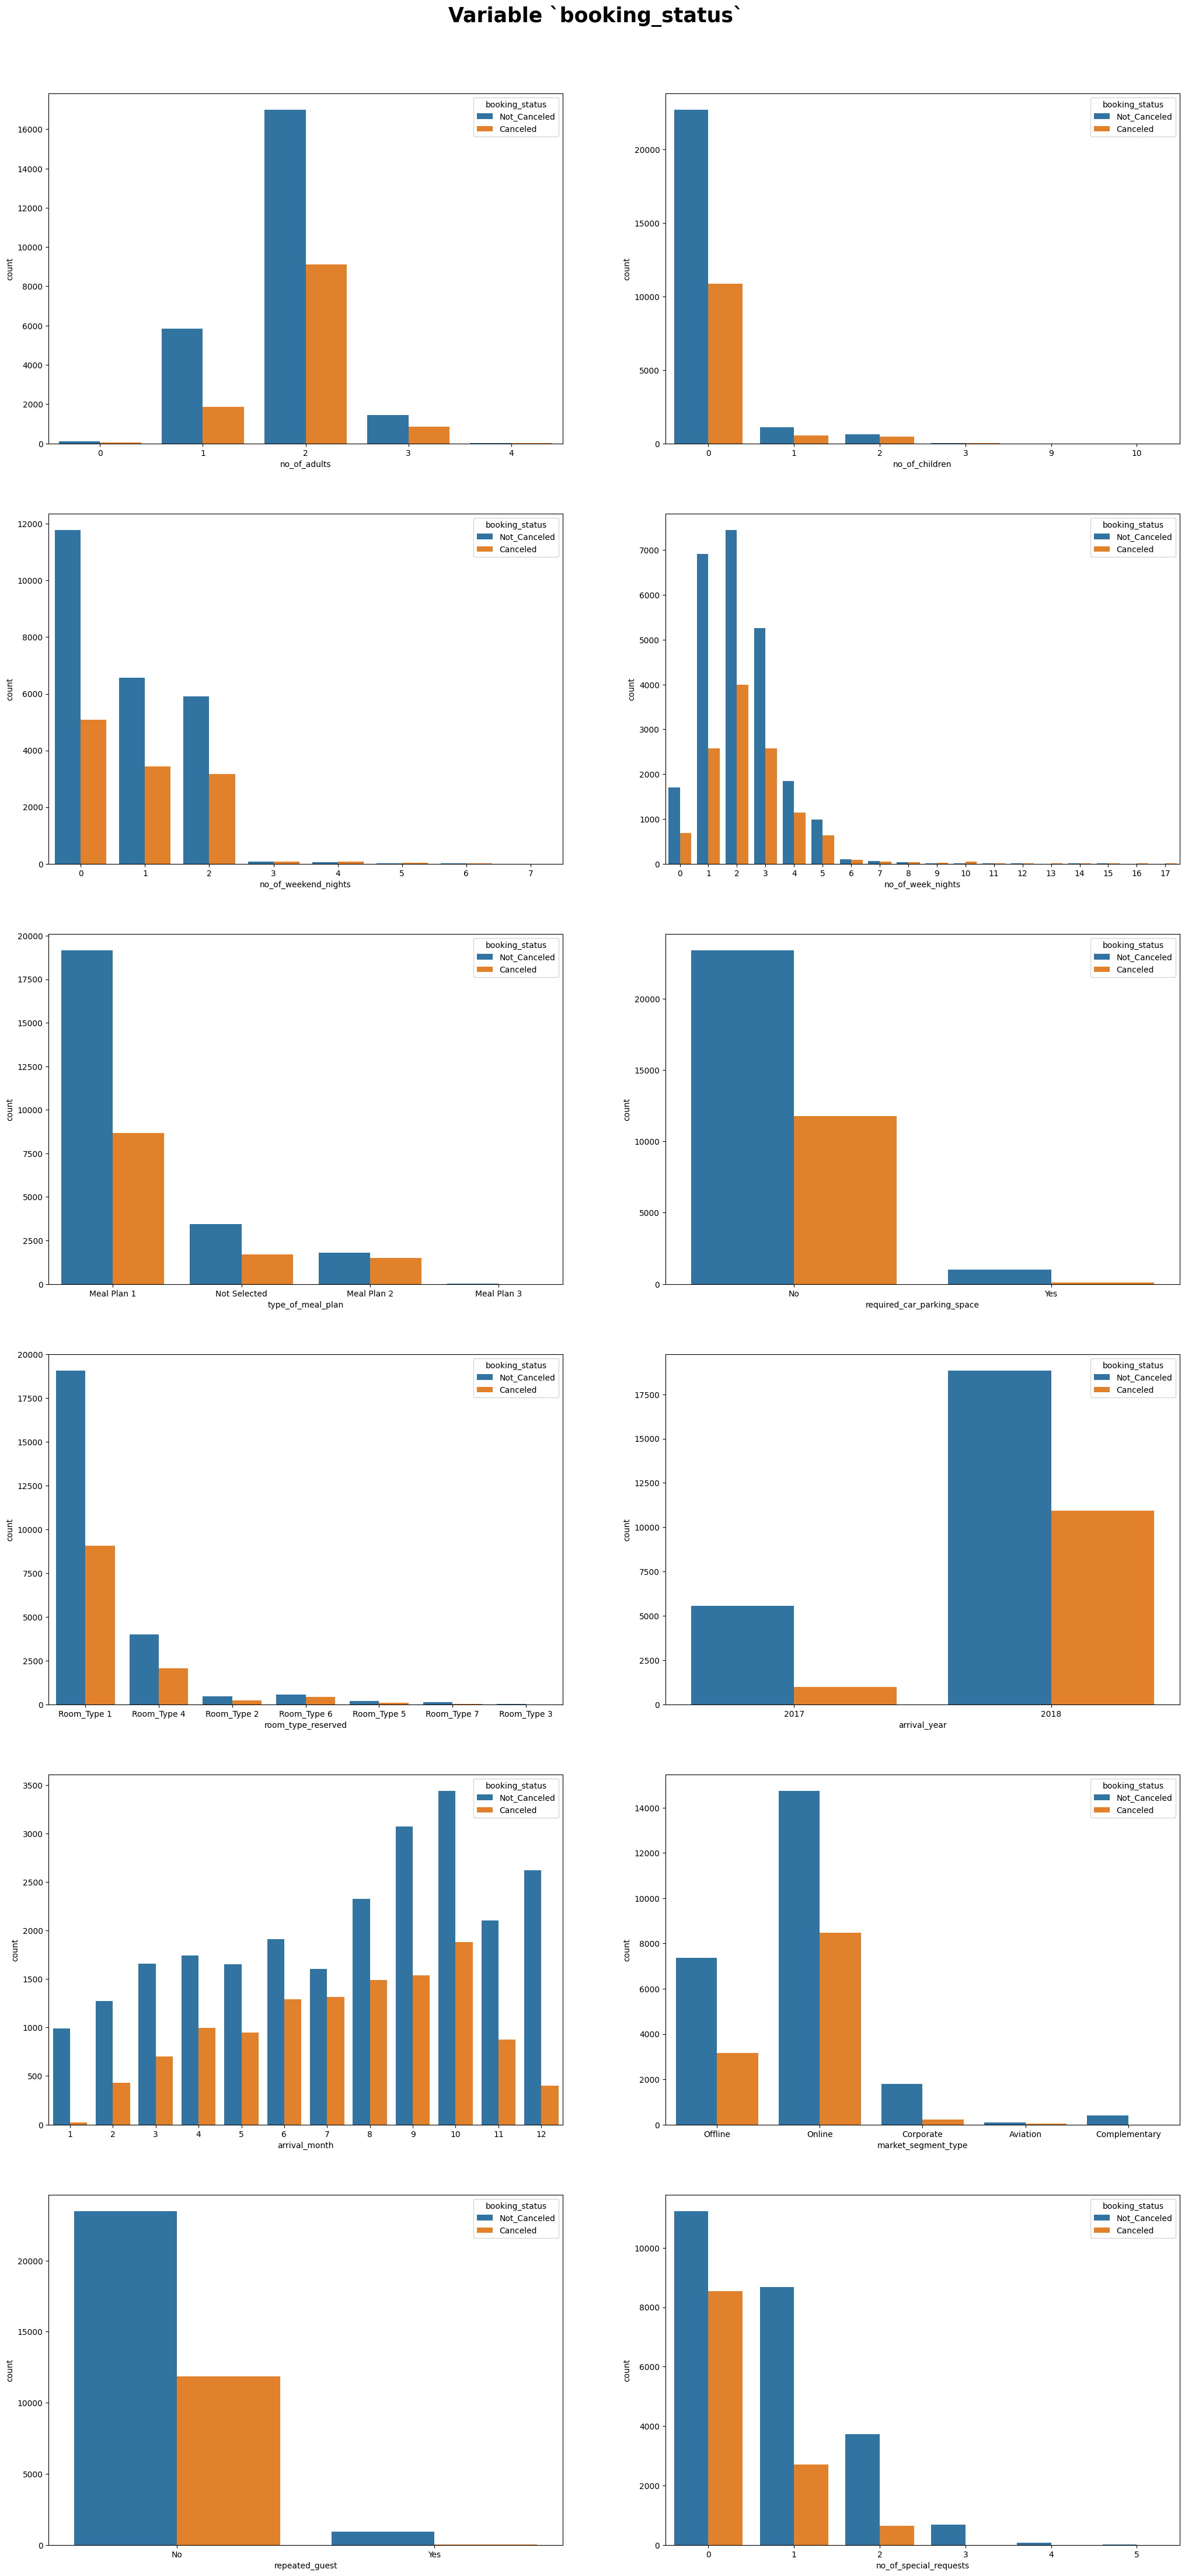

In [ ]:
# booking_status와의 관계
col = 0
row = 0

fig, ax = plt.subplots(6, 2, figsize=(25, 50))

for column in data.drop(
    [
        "Booking_ID",
        "lead_time",
        "arrival_date",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
        "booking_status",
        "no_of_previous_cancellations"
    ],
    axis=1
).columns:
    sns.countplot(data=data, x=column, hue='booking_status', ax=ax[row, col])

    col += 1
    if col > 1:
        row += 1
        col = 0

fig.subplots_adjust(top=0.95)
plt.suptitle("Variable `booking_status`", fontweight="bold", fontsize=25)

### **3.1 변수 분포**

**Categorical**

<Axes: xlabel='booking_status', ylabel='count'>

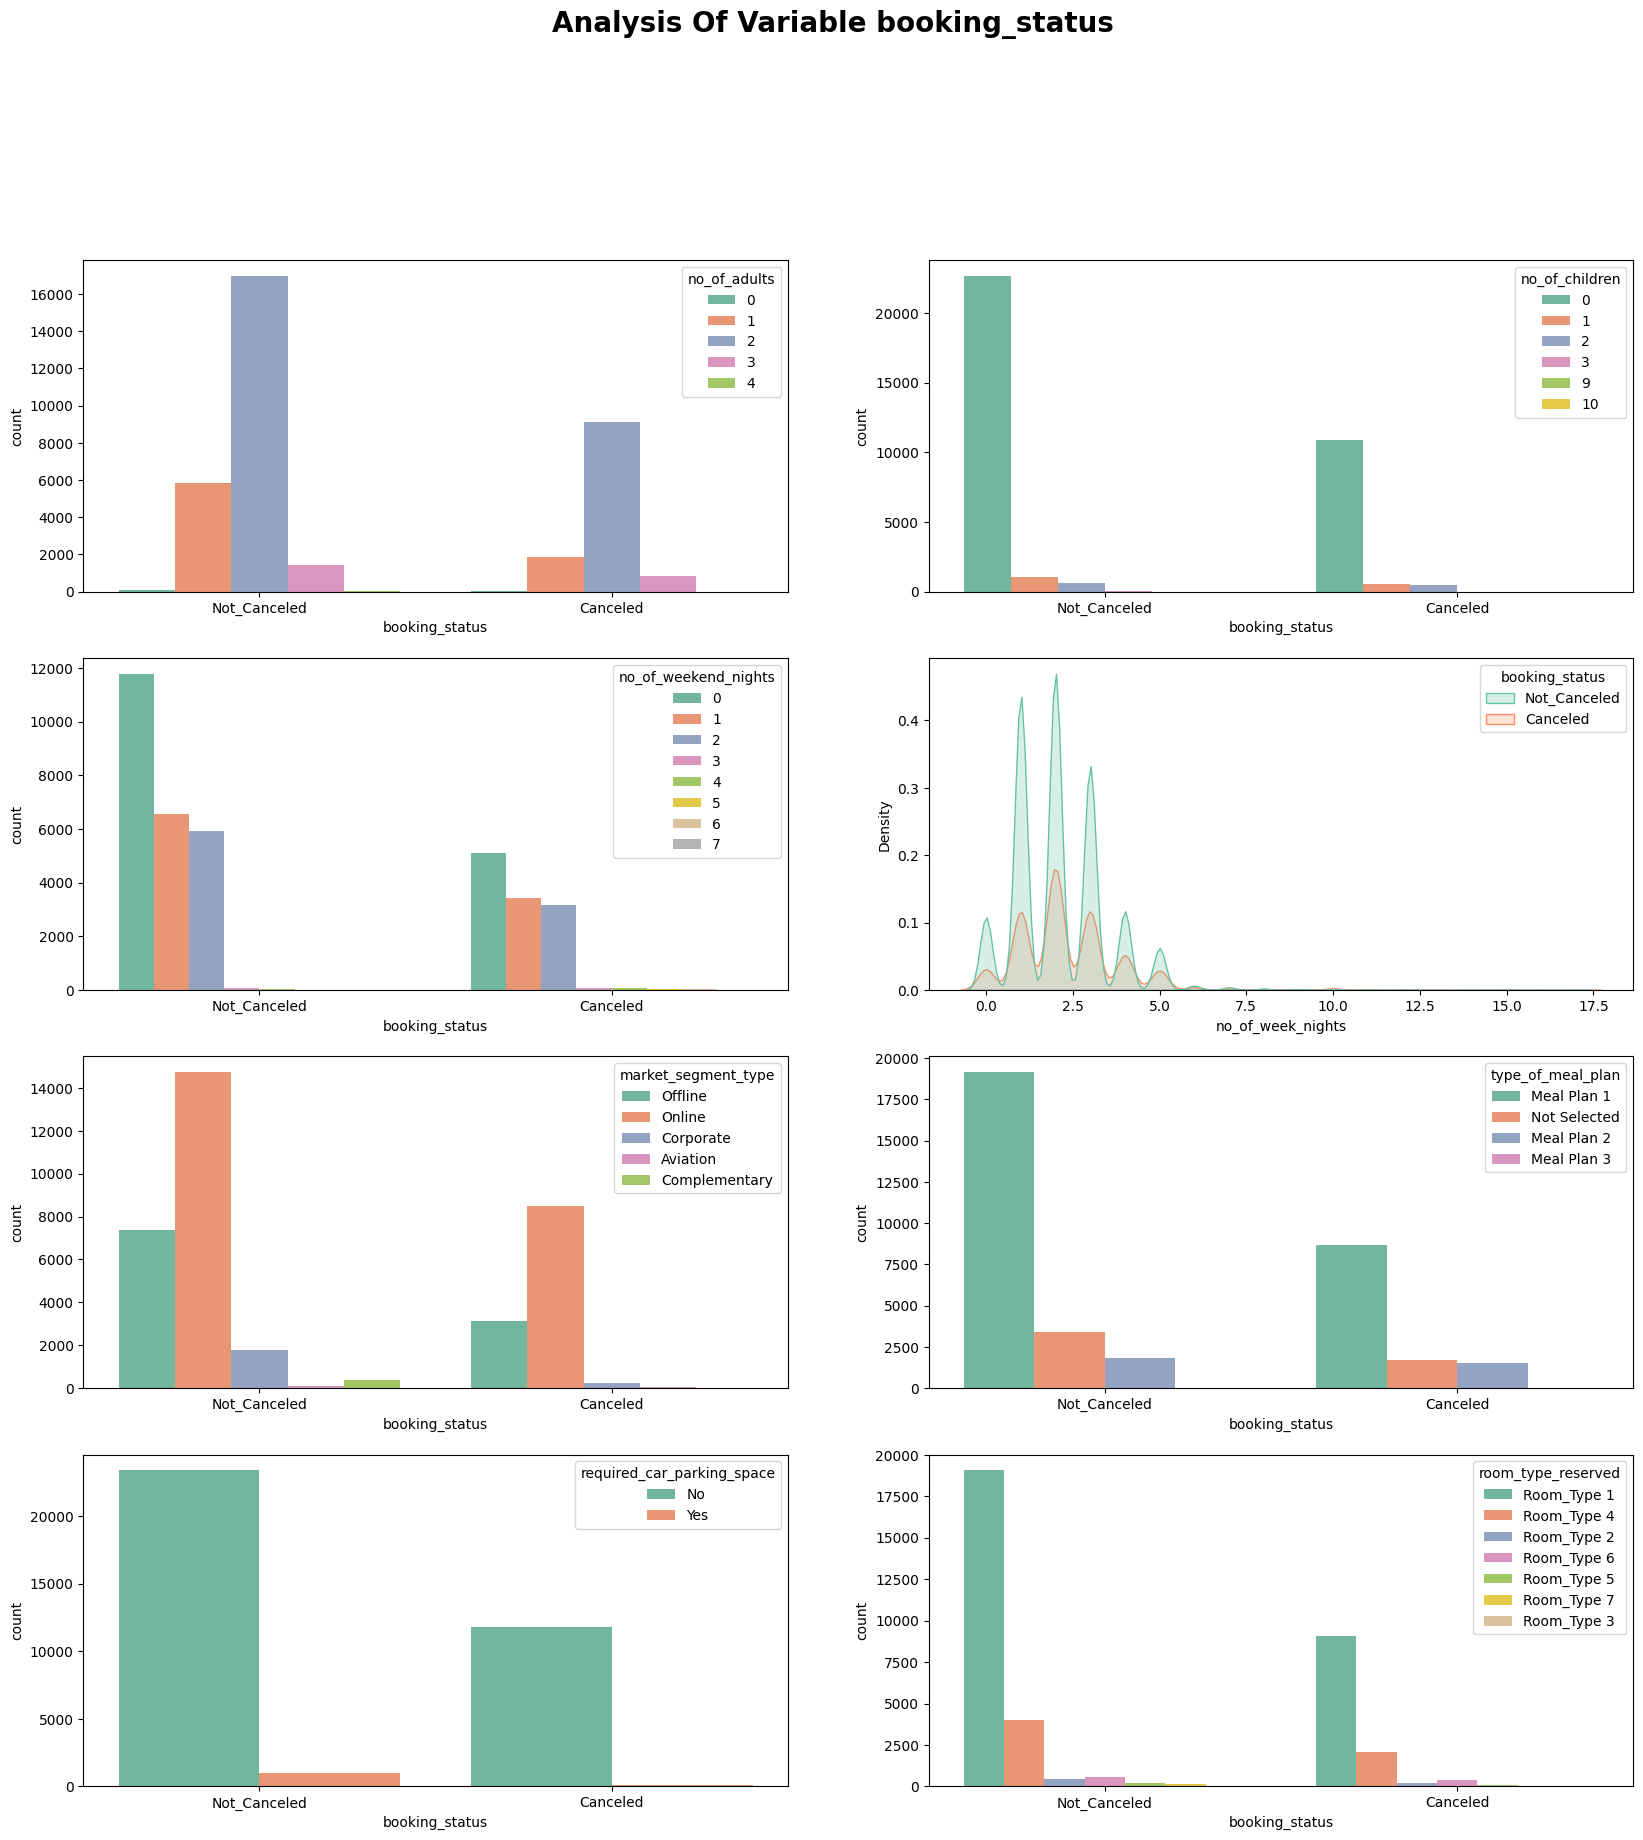

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = data)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = data)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = data)

plt.subplot(5,2,4)
sns.kdeplot(x='no_of_week_nights', hue='booking_status', palette = 'Set2', shade=True, data=data)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = data)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = data)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = data)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = data)

**Continuous**

<Axes: xlabel='lead_time', ylabel='Count'>

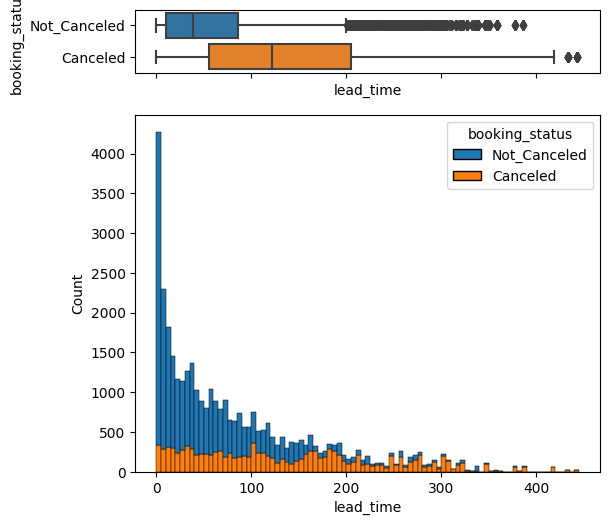

In [ ]:
# lead_time
binwidth = {
    'lead_time': 5., # 5 days
    'avg_price_per_room': 10. # 10$
}

props = {
    'boxprops': {'edgecolor': 'w'},
    'medianprops': {'color': 'w'},
    'whiskerprops': {'color': 'w'},
    'capprops': {'color': 'w'},
    'flierprops': {'markeredgecolor': 'w', 'marker': 'o'}
}

fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex='col', sharey='row', 
                                      figsize=(6, 6), 
                                      gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=data, x='lead_time', y='booking_status', ax=ax_box, orient='h')

sns.histplot(data=data, x='lead_time', ax=ax_hist, 
             binwidth=binwidth['lead_time'], hue="booking_status", 
             multiple='stack', alpha=1.)

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

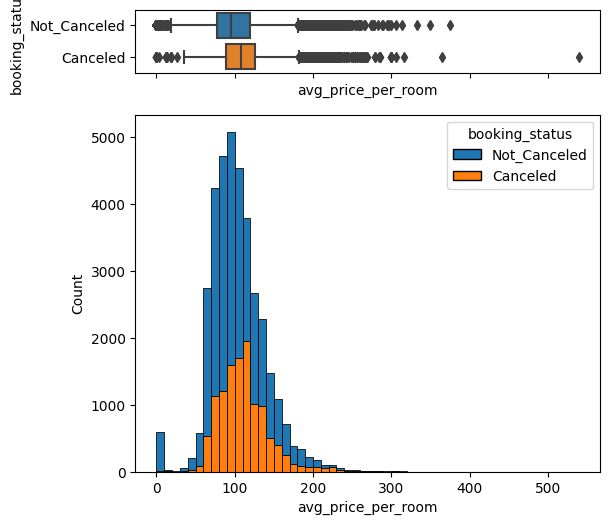

In [ ]:
# avg_price_per_room
fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex='col', sharey='row', 
                                      figsize=(6, 6), 
                                      gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=data, x='avg_price_per_room', y='booking_status', ax=ax_box, 
            orient='h')

sns.histplot(data=data, x='avg_price_per_room', ax=ax_hist, 
             binwidth=binwidth['avg_price_per_room'], hue="booking_status", 
             multiple='stack', alpha=1.)

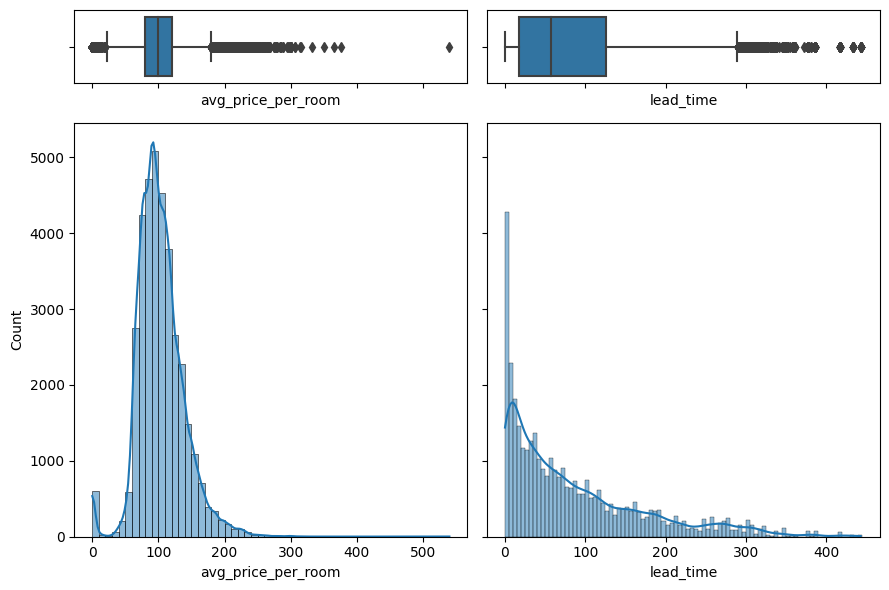

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2, 2, sharex='col', sharey='row', 
                                      figsize=(9, 6), 
                                      gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=data, x='avg_price_per_room', ax=ax_box[0], orient='h')
sns.histplot(data=data, x='avg_price_per_room', ax=ax_hist[0], 
             binwidth=binwidth['avg_price_per_room'], kde=True)

sns.boxplot(data=data, x='lead_time', ax=ax_box[1], orient='h')
sns.histplot(data=data, x='lead_time', ax=ax_hist[1], 
             binwidth=binwidth['lead_time'], kde=True)

plt.tight_layout()

### **3.2 변수 간 상관관계**

**Correlation**

In [ ]:
import plotly.express as px

data2_encode = data.copy()

labels_to_encode = ['type_of_meal_plan', 'required_car_parking_space',
                    'room_type_reserved', 'market_segment_type',
                    'repeated_guest', 'booking_status']

for label in labels_to_encode:
  data2_encode[label] = data2_encode[label].astype('category')
  data2_encode[label] = data2_encode[label].cat.codes

df_corr_bar = data2_encode.corr().booking_status.sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation="h", color_discrete_sequence=["#AEC6CF"])
fig.update_layout(showlegend=False)
fig.show()

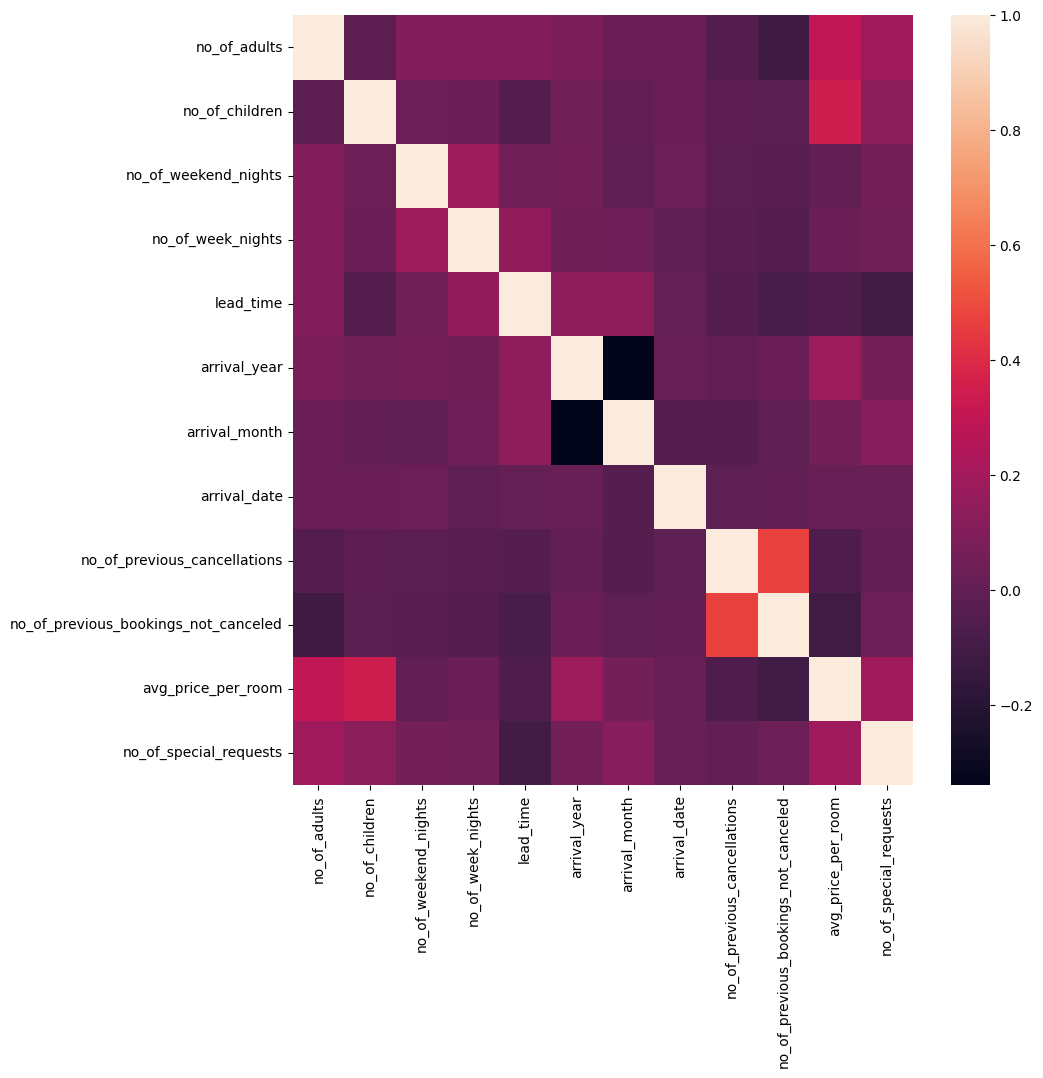

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

---

## **4. 변수 처리**

### **4.1 이상치 확인**

#### **4.1.1 Missing value**
- missing values는 따로 존재하지 않는 것으로 확인됨

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### **4.1.2 Outliers**

#### average_price_per_room

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

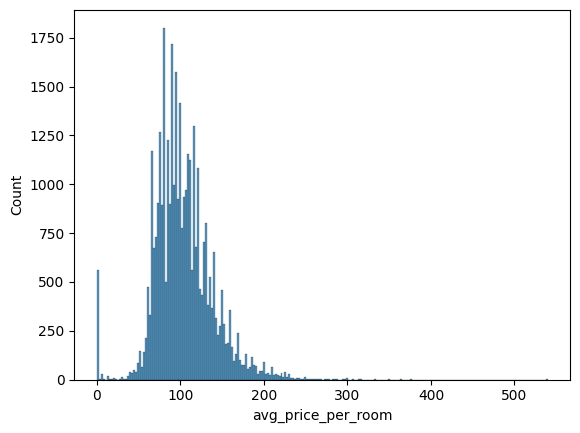

In [ ]:
sns.histplot(data['avg_price_per_room'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f849ab11190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f849ab116d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f849ab01eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f849ab11c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f849ab11eb0>],
 'means': []}

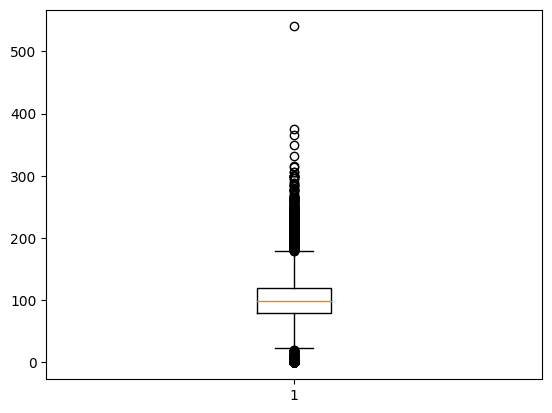

In [ ]:
plt.boxplot(data['avg_price_per_room'])

### **4.2 변수 drop 및 생성**

**Booking ID**
- 사용하지 않을 예정인 Booking_ID 변수는 drop 해줌

In [ ]:
# Booking_ID: 불필요. 제거
data.drop('Booking_ID', axis=1, inplace=True)

**Total guest** <br/>
- no_of_adults와 no_of_children를 합쳐 총 투숙 인원 변수 생성
- 기존 no_of_adults와 no_of_children 변수는 drop

In [ ]:
# 총 인원 수
data['total_guest'] = data['no_of_adults'] + data['no_of_children']

**Total day**
- no_of_weekend_nights와 no_of_week_nights를 합쳐 총 투숙기간 변수 생성
- 기존 no_of_weekend_nights와 no_of_week_nights 변수는 drop

In [ ]:
# 총 투숙 기간
data['total_day'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

**Cancel Rate**

In [ ]:
# 취소 비율로 따지기 	
total_resv = data['no_of_previous_cancellations'] + data['no_of_previous_bookings_not_canceled']
data['cancel_rate'] = data['no_of_previous_bookings_not_canceled'] / total_resv

data['cancel_rate']= data['cancel_rate'].fillna(0)

**Season**

- 1,2,7,8,12월 성수기 -> peak
- 나머지 비성수기 -> off

In [ ]:
# 성수기/비성수기
temp=list(range(data.shape[0]))
def season_creating(df_name):
  for i in range(df_name.shape[0]):
      if df_name.iloc[i]['arrival_month'] in [1,2,7,8,12]:
          temp[i] = 'peak'
      else:
          temp[i] = 'off'
  return temp
data['season']=season_creating(data)

---

## **5. Modeling**

### **5.1 Encoding**

In [ ]:
# required_car_parking_space (0->No, 1->Yes)
data['required_car_parking_space'].replace(0, "No", inplace=True)
data['required_car_parking_space'].replace(1, "Yes", inplace=True)

# repeated_guest (0->No, 1->Yes)
data['repeated_guest'].replace(0, "No", inplace=True)
data['repeated_guest'].replace(1, "Yes", inplace=True)

# booking_status (Not_Canceled->0, Canceled->1)
data['booking_status'].replace("Not_Canceled", 0, inplace=True)
data['booking_status'].replace("Canceled", 1, inplace=True)

data = pd.get_dummies(data, columns=['type_of_meal_plan'], prefix='meal')
data = pd.get_dummies(data, columns=['required_car_parking_space'], prefix='park')
data = pd.get_dummies(data, columns=['room_type_reserved'], prefix='room')
data = pd.get_dummies(data, columns=['market_segment_type'], prefix='market')
data = pd.get_dummies(data, columns=['repeated_guest'], prefix='repeated')
data = pd.get_dummies(data, columns=['season'], prefix='season')

#### **5.1.1 Train-Test split**

In [ ]:
X = data.drop(columns="booking_status", axis=1)
y = data["booking_status"]

X = pd.get_dummies(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **5.2 Base Model**

#### **5.2.1 Random Forest**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

accuracy_score(rfc_pred,y_test)

0.9029634734665748

#### **5.2.2 XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, pred_xgb)))

Model accuracy score : 0.8879


In [ ]:
feature_scores = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

market_Online                           0.269921
no_of_special_requests                  0.086730
lead_time                               0.072670
park_No                                 0.061271
arrival_year                            0.047522
total_guest                             0.044880
no_of_adults                            0.039012
repeated_No                             0.034501
arrival_month                           0.033274
market_Offline                          0.031543
avg_price_per_room                      0.031536
season_off                              0.028118
no_of_weekend_nights                    0.026412
room_Room_Type 4                        0.021047
meal_Meal Plan 2                        0.017854
no_of_week_nights                       0.016150
meal_Meal Plan 1                        0.015870
market_Corporate                        0.015490
total_day                               0.013966
cancel_rate                             0.013596
room_Room_Type 2    

In [ ]:
params = {'max_depth':[6,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

In [ ]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(xgb, param_grid=params, cv=3)
gridcv.fit(X_train2, y_train2, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_val, y_val)])

[0]	validation_0-auc:0.83616
[1]	validation_0-auc:0.87667
[2]	validation_0-auc:0.88435
[3]	validation_0-auc:0.89675
[4]	validation_0-auc:0.90489
[5]	validation_0-auc:0.91335
[6]	validation_0-auc:0.91367
[7]	validation_0-auc:0.91730
[8]	validation_0-auc:0.91922
[9]	validation_0-auc:0.91850
[10]	validation_0-auc:0.92465
[11]	validation_0-auc:0.92621
[12]	validation_0-auc:0.92604
[13]	validation_0-auc:0.92856
[14]	validation_0-auc:0.92962
[15]	validation_0-auc:0.93081
[16]	validation_0-auc:0.93205
[17]	validation_0-auc:0.93352
[18]	validation_0-auc:0.93377
[19]	validation_0-auc:0.93559
[20]	validation_0-auc:0.93596
[21]	validation_0-auc:0.93619
[22]	validation_0-auc:0.93656
[23]	validation_0-auc:0.93757
[24]	validation_0-auc:0.93801
[25]	validation_0-auc:0.93843
[26]	validation_0-auc:0.93896
[27]	validation_0-auc:0.93971
[28]	validation_0-auc:0.94030
[29]	validation_0-auc:0.94048
[30]	validation_0-auc:0.94051
[31]	validation_0-auc:0.94085
[32]	validation_0-auc:0.94105
[33]	validation_0-au

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.5, 0.75], 'max_depth': [6, 7],
                         'min_child_weight': [1, 3]})

In [ ]:
print(gridcv.best_params_)

{'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1}


In [ ]:
xgb2 = XGBClassifier(n_estimators=500, max_depth=7, colsample_bytree=0.75, min_child_weight=1, random_state=42)
xgb2.fit(X_train, y_train)

pred_xgb2 = xgb2.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, pred_xgb2)))

Model accuracy score : 0.9042


### **5.2.3 Extra tree**

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=5, random_state=1886)
# Fit the model
etc.fit(X_train, y_train)

# Predict the model
etc_predict = etc.predict(X_test)

print('The accuracy of the Random Forest is', accuracy_score(etc_predict,y_test))

The accuracy of the Random Forest is 0.8803583735354927


### **5.3 Ensemble Model**

In [43]:
from sklearn.linear_model import LogisticRegression

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

pred = np.array([rfc_pred, pred_xgb2, etc_predict])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦
pred = np.transpose(pred)
print(pred.shape)

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

accuracy=accuracy_score(y_test,final)
accuracy

(3, 7255)
(7255, 3)


0.9058580289455548